# Object/Data Selection

This simple application lets user select objects and data stored in the target `geoh5` project.

New user? Visit the [Getting Started](../installation.rst) page.

In [1]:
from geoapps.selection import ObjectDataSelection
app = ObjectDataSelection(
    h5file=r"../../../assets/FlinFlon.geoh5", 
    objects="geochem" # For demonstration
)
app()

The `Object` and `Data` [ipywidgets.dropdown](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Dropdown) menus are linked with an observer, such that the list of available data is updated on change of object.

Alternatively, the `Data` selection can be converted to a [ipywidget.SelectMultiple](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#SelectMultiple) using the `select_multiple` option on instantiation:

In [2]:
app = ObjectDataSelection(
    select_multiple=True, 
    h5file=r"../../../assets/FlinFlon.geoh5", 
    objects="geochem",
    data=["Ag","Al2O3"]# For demonstration
)
app.data

SelectMultiple(description='Data: ', index=(2, 3), options=('', '--- Channels ---', 'Ag', 'Al2O3', 'As', 'Au',…

## Accessing selection

Selected `Object` and `Data` names can be accessed from their respective `value` property:

In [3]:
app.objects.value

'geochem'

Alternatively, the application can return [geoh5py.entities](https://geoh5py.readthedocs.io/en/latest/content/user_guide/entities.html#Entities):

In [4]:
app.get_selected_entities()

(<geoh5py.objects.points.Points at 0x1d0d8b0bf08>,
  <geoh5py.data.float_data.FloatData at 0x1d0d8b338c8>])

from which data values and geometry can be accessed and manipulated.

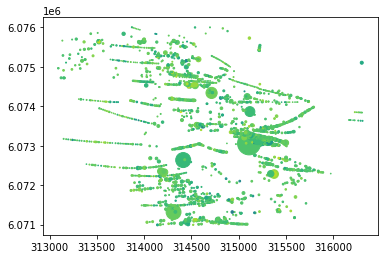

In [5]:
from matplotlib.pyplot import scatter
points, data = app.get_selected_entities()
scatter(points.vertices[:, 0], points.vertices[:, 1], data[0].values*10, c=data[1].values)